## Machine_learning 

Example code and result graph code for the two best performing machine learning models on benchmark datasets

In [28]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_json('/dataset/benchmark.json')
data = pd.DataFrame(df['features'].tolist())

kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
R2 = []
MSE = []
MAE = []
RMSE = []
for train_index, test_index in kf.split(data):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = df["LogS"].iloc[train_index], df["LogS"].iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R2_score:"+str(r2_score(y_test,y_pred)))
    print("MSE:"+str(mean_squared_error(y_test,y_pred)))
    print("MAE:"+str(mean_absolute_error(y_test,y_pred)))
    print("RMSE:"+str(np.sqrt(mean_squared_error(y_test,y_pred))))

    R2.append(r2_score(y_test,y_pred))
    MSE.append(mean_squared_error(y_test,y_pred))
    MAE.append(mean_absolute_error(y_test,y_pred))
    RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

print(f"Average R2: {np.mean(R2)}")
print(f"Average MSE: {np.mean(MSE)}")
print(f"Average MAE: {np.mean(MAE)}")
print(f"Average RMSE: {np.mean(RMSE)}")

R2_score:0.7633753457916574
MSE:1.089995373340552
MAE:0.7358256290437274
RMSE:1.0440284351206877
R2_score:0.7315660324199701
MSE:1.195496718784497
MAE:0.7821029545350157
RMSE:1.0933877257334184
R2_score:0.7356126410518623
MSE:1.1213563790265004
MAE:0.733478555405752
RMSE:1.058941159378792
R2_score:0.7319725418108088
MSE:1.1749411845476583
MAE:0.7736849671677023
RMSE:1.0839470395492845
R2_score:0.7623006118481614
MSE:1.0898894099109098
MAE:0.7445879196333921
RMSE:1.0439776865004873
Average R2: 0.7449654345844922
Average MSE: 1.1343358131220236
Average MAE: 0.7539360051571179
Average RMSE: 1.0648564092565338


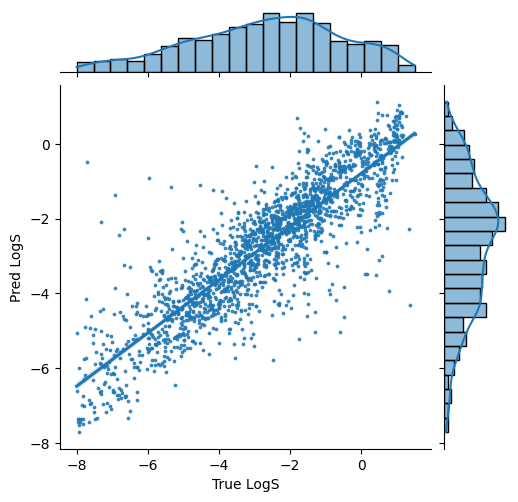

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


df = sns.load_dataset('iris')
g = sns.jointplot(x=y_test, y=y_pred, kind='reg', scatter_kws={'s': 3}).set_axis_labels( 'True LogS', 'Pred LogS')
g.fig.set_size_inches(5, 5)
plt.show()

In [30]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import json
with open('/dataset/benchmark.json', 'r') as f:
    data = json.load(f) 
df = pd.read_json('/dataset/benchmark.json')
X = df['features'].tolist()
y = [0 if drug['LogS'] >= -1 else 1 if drug['LogS'] >= -3 else 2 for drug in data]

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

kf = KFold(n_splits=5, shuffle=True)

weighted_accuracy_scores = []
weighted_precision_scores = []
weighted_recall_scores = []
weighted_f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_val = np.array(X)[train_index], np.array(X)[test_index]
    y_train, y_val = np.array(y)[train_index], np.array(y)[test_index]
    
    rf_classifier.fit(X_train, y_train)
    
    y_pred = rf_classifier.predict(X_val)
    y_score = rf_classifier.predict_proba(X_val)

    t = classification_report(y_val,y_pred, target_names=['0', '1', '2'],digits=4)
    print(t)
    
    accuracy = accuracy_score(y_val, y_pred)
    weighted_accuracy_scores.append(accuracy)

    precision, recall, fscore, _ = precision_recall_fscore_support(y_val, y_pred, average='weighted')
    weighted_precision_scores.append(precision)
    weighted_recall_scores.append(recall)
    weighted_f1_scores.append(2 * (precision * recall) / (precision + recall)) 

mean_weighted_accuracy = sum(weighted_accuracy_scores) / len(weighted_accuracy_scores)
mean_weighted_precision = sum(weighted_precision_scores) / len(weighted_precision_scores)
mean_weighted_recall = sum(weighted_recall_scores) / len(weighted_recall_scores)
mean_weighted_l1 = sum(weighted_f1_scores) / len(weighted_f1_scores)

print("Mean weighted accuracy:", mean_weighted_accuracy)
print("Mean weighted precision:", mean_weighted_precision)
print("Mean weighted recall:", mean_weighted_recall)
print("Mean weighted L1 score:", mean_weighted_l1)


              precision    recall  f1-score   support

           0     0.7876    0.6110    0.6881       437
           1     0.6863    0.7147    0.7002       701
           2     0.7965    0.8660    0.8298       791

    accuracy                         0.7532      1929
   macro avg     0.7568    0.7306    0.7394      1929
weighted avg     0.7544    0.7532    0.7506      1929

              precision    recall  f1-score   support

           0     0.7884    0.6716    0.7253       405
           1     0.6875    0.7091    0.6982       667
           2     0.8212    0.8586    0.8395       856

    accuracy                         0.7676      1928
   macro avg     0.7657    0.7465    0.7543      1928
weighted avg     0.7681    0.7676    0.7666      1928

              precision    recall  f1-score   support

           0     0.8267    0.6705    0.7405       434
           1     0.7031    0.7177    0.7103       673
           2     0.8054    0.8721    0.8374       821

    accuracy        

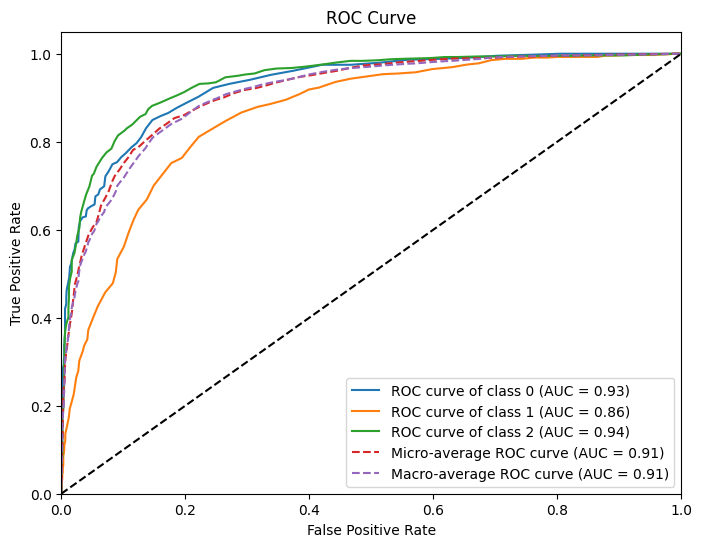

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


y_true_binarized = label_binarize(y_val, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_micro, tpr_micro, _ = roc_curve(y_true_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 3
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

plt.figure(figsize=(8, 6))

for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC curve (AUC = {roc_auc_micro:.2f})', linestyle='--')
plt.plot(fpr_macro, tpr_macro, label=f'Macro-average ROC curve (AUC = {roc_auc_macro:.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


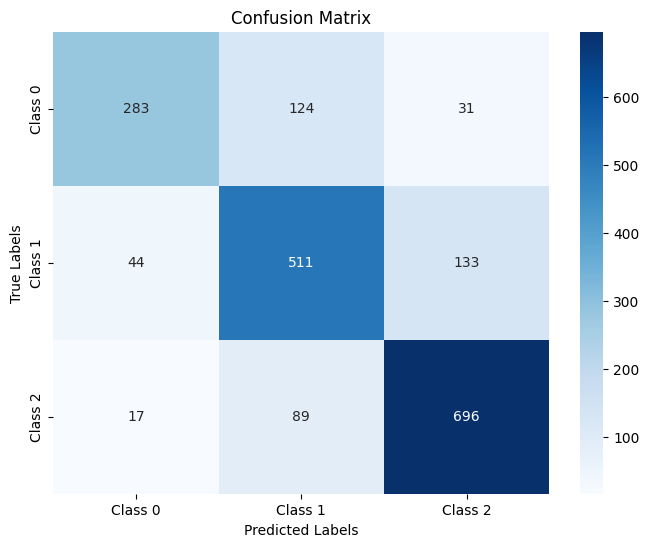

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
